In [14]:
import matplotlib.pyplot as plt
from pymatgen.io.vasp.outputs import Xdatcar
import matplotlib.patches as Patches
import numpy as np
import matplotlib.patheffects as PathEffects

In [2]:
data = Xdatcar('XDATCAR_monoclinic')

In [3]:
structures = data.structures

lat_param = 21.098539
adj_lat_param = 29.83784000005768

x_coord_unit = 22.42/2
z_coord_unit = 30.94/2

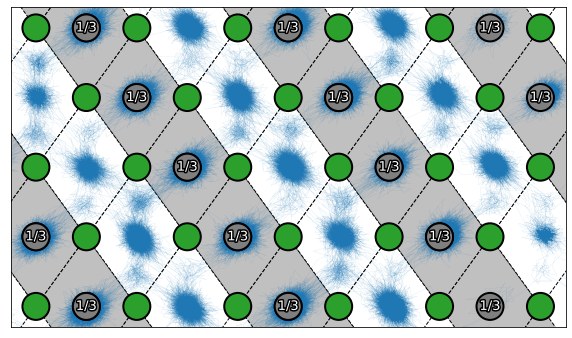

In [45]:
fig, ax = plt.subplots(figsize=(adj_lat_param/3, lat_param/3))

for i in range(0, len(structures[0])):
    x = []
    y = []
    z = []
    for s in structures:
        if s[i].species_string == 'Li':
            x.append(s[i].x)
            y.append(s[i].y)
            z.append(s[i].z)
    x_adj = []
    z_adj = []
    for x_i, z_i in zip(x,z):
        x_adj.append(x_i*np.cos(5.34) - z_i*np.sin(5.34) - 11.2)
        z_adj.append(x_i*np.sin(5.34) + z_i*np.cos(5.34) - 0.1)
    ax.plot(x_adj, z_adj, color='tab:blue', lw=0.05, zorder=0.5)
    
for i in range(0, len(structures[0])):
    if structures[0][i].species_string == 'Sc':
        x = s[i].x
        y = s[i].y
        z = s[i].z
        x_adj = x*np.cos(5.34) - z*np.sin(5.34) - 11
        z_adj = x*np.sin(5.34) + z*np.cos(5.34)
        x_adj = (np.round((x_adj/x_coord_unit)*6)/6)*x_coord_unit
        z_adj = (np.round((z_adj/z_coord_unit)*6)/6)*z_coord_unit
        sc_ion = Patches.Circle((x_adj, z_adj), radius=0.5, fc='tab:grey', ec='black', zorder=1, linewidth=2)
        ax.add_patch(sc_ion)
    
cl_x_1 = [-7/6, -5/6, -3/6, -1/6, 1/6, 3/6, 5/6, 7/6]
cl_y_1 = [-4/6, -2/6, 0/6, 2/6, 4/6]

cl_x_2 = [-6/6, -4/6, -2/6, 0/6, 2/6, 4/6, 6/6]
cl_y_2 = [-5/6, -3/6, -1/6, 1/6, 3/6, 5/6]

for clx in cl_x_1:
    for cly in cl_y_1:
        cl_ion = Patches.Circle((clx*x_coord_unit, cly*z_coord_unit), radius=0.5, fc='tab:green', ec='black', zorder=1, linewidth=2)
        ax.add_patch(cl_ion)
        
for clx in cl_x_2:
    for cly in cl_y_2:
        cl_ion = Patches.Circle((clx*x_coord_unit, cly*z_coord_unit), radius=0.5, fc='tab:green', ec='black', zorder=1, linewidth=2)
        ax.add_patch(cl_ion)

def add_polygon(x, y, color):
    # Creates rhombus based on left corner.
    p = Patches.Polygon([[x_coord_unit*x/6, z_coord_unit*y/6], [x_coord_unit*(x+1)/6, z_coord_unit*(y+1)/6], [x_coord_unit*(x+2)/6, z_coord_unit*y/6], [x_coord_unit*(x+1)/6, z_coord_unit*(y-1)/6]], closed=True, fc=color, ec='black', ls='--', zorder=0)
    ax.add_patch(p)    

#All Sc-containing sites
x1 = [-7, -6, -6, -5, -5, -4, -4, -3, -2, -2, -1, -1, 0,  1,  2, 2,  3, 3, 4,  4, 5, 0]
z1 = [ 0,  -1,  3, -2,  2, 1, -3,  0,  3, -1, -2,  2,  1, 0, -1, 3, -2, 2, 1, -3, 0, -3]

for x,z  in zip(x1,z1):
    add_polygon(x, z, 'silver')

#All non-Sc-contatining sites
x2 = [-7, -6, -5, -4, -3, -3, -2, -1, 0, 1, 1, 2, 3, 4,5]
z2 = [-2, 1, 0, -1, -2, 2, 1, 0, -1, -2, 2, 1, 0, -1, 2]

for x,z  in zip(x2,z2):
    add_polygon(x, z, 'white')

#Add missing Sc
x3 = [4, 4, 5]
y3 = [2, -2, 1]

for x, y in zip(x3, y3):
    sc_ion = Patches.Circle((x_coord_unit*x/6, z_coord_unit*y/6), radius=0.5, fc='tab:grey', ec='black', zorder=1, linewidth=2)
    ax.add_patch(sc_ion)

#Sc labels
x4 = [-5, -4, -4, -3, -2, -1, 0, 0, 1, 2, 3, 4, 4, 5]
y4 = [-1, 2, -2, 1, 0, -1, 2, -2, 1, 0, -1, 2, -2, 1]

for x, y in zip(x4, y4):
    depth = ax.text(x_coord_unit*x/6, z_coord_unit*y/6, '1/3', ha='center', va='center', color='white', size=13)
    depth.set_path_effects([PathEffects.withStroke(linewidth=3, foreground='black')])      
    
ax.set(xlim=(-5.5/6*x_coord_unit, 5.5/6*x_coord_unit), ylim=(-2.3/6*z_coord_unit, 2.3/6*z_coord_unit))

ax.set_aspect('equal')

ax.set_xticks([])
ax.set_yticks([])

plt.savefig('monoclinic_pic.png', bbox_inches='tight',dpi=500)

In [30]:
len(z1)

18